<a href="https://colab.research.google.com/github/marino1846067/CMP2021/blob/main/4_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy: Numerical Python package 

- [NumPy](https://www.numpy.org) is perhaps the most important  package for numerical computing in Python
- The n-dimentional array in NumPy is used as a a basic object in most Python packages for data exchange
  - We will look at its methods and semantics through examples
- Some of the most important features of NumPy are 
  - `ndarray`: multidimensional array for **fast and efficient array-oriented operations** and arithmetics
  - Mathematical functions for **fast operation on arrays without using loops and iterations**
  - Tools for I/O to and from disk
  - Linear algebra
  - Random generation 
  - API (application programming interface) to connect NumPy with C and C++ libraries

## 1. NumPy `ndarray`: a multidimensional array object
`ndarray` is an array that can have an arbirary number of dimensions. We will see examples in 2D and 3D for calculations.

Its main feature: vector calculations are extremely fast!

Let's see how much faster an `ndarray` object is compared to a loop (with comprehension).

In [ ]:
import numpy as np
import math as m

nmax = 100000

my_arr = np.arange(1,nmax)
print(type(my_arr))

my_list = list(range(1,nmax))
print(type(my_list))

n_test = 100

%time for _ in range(n_test): my_arr2 = my_arr * 2

%time for _ in range(n_test): my_list2 = [x*2 for x in my_list]

<class 'numpy.ndarray'>
<class 'list'>
CPU times: user 17.4 ms, sys: 3.85 ms, total: 21.2 ms
Wall time: 29.9 ms
CPU times: user 1.18 s, sys: 70.8 ms, total: 1.25 s
Wall time: 1.32 s


__NumPy based algorithms are generally 10 to 100 times faster than pure Python counterparts!__

In the examples below you should also notice how much `**` costs in terms of runtime.  **Never forget to try to optimize small things like these: they can make a big difference.**

In [ ]:
%time for _ in range(n_test): my_arr3 = my_arr **3
%time for _ in range(n_test): my_arr3 = my_arr * my_arr * my_arr

%time for _ in range(n_test): my_list3 = [x**3 for x in my_list]
%time for _ in range(n_test): my_list3 = [x*x*x for x in my_list] 

CPU times: user 31.9 ms, sys: 2.82 ms, total: 34.7 ms
Wall time: 36.9 ms
CPU times: user 25 ms, sys: 1.1 ms, total: 26.1 ms
Wall time: 25.7 ms
CPU times: user 3.07 s, sys: 78.5 ms, total: 3.15 s
Wall time: 3.16 s
CPU times: user 1.21 s, sys: 11 ms, total: 1.22 s
Wall time: 1.22 s


In [ ]:
%time for _ in range(n_test): my_arr3 = np.log(my_arr**2)
%time for _ in range(n_test): my_arr3 = np.log(my_arr*my_arr)

%time for _ in range(n_test): my_list3 = [m.log(x**2) for x in my_list]
%time for _ in range(n_test): my_list3 = [m.log(x*x) for x in my_list]

CPU times: user 247 ms, sys: 1.75 ms, total: 249 ms
Wall time: 254 ms
CPU times: user 246 ms, sys: 3.89 ms, total: 250 ms
Wall time: 253 ms
CPU times: user 4.59 s, sys: 25.5 ms, total: 4.62 s
Wall time: 4.64 s
CPU times: user 2.62 s, sys: 14.5 ms, total: 2.64 s
Wall time: 2.64 s


## 2. Creating `ndarray`s
Just like the example below, all NumPy functions and classes use `ndarray` as return type. All the user needs to do is to specify the dimensions and the size of the array to be created.

In [ ]:
my_arr = np.arange(1,nmax)
print(type(my_arr))

<class 'numpy.ndarray'>


### Array of uniformly sampled random numbers (between 0 and 1)

If you need a different intervale, use `np.random.uniform`

In [ ]:
np.random.rand(10,3)

array([[0.9613549 , 0.60348376, 0.77351869],
       [0.49896084, 0.09007416, 0.76665024],
       [0.35323922, 0.84314206, 0.53321587],
       [0.88502903, 0.15000282, 0.20361445],
       [0.87111551, 0.94147856, 0.60125332],
       [0.76225207, 0.98688153, 0.93141443],
       [0.03702631, 0.45878799, 0.39554424],
       [0.11759647, 0.7421717 , 0.90094193],
       [0.27207621, 0.71472789, 0.43706352],
       [0.93658986, 0.09190916, 0.99770963]])

In [ ]:
np.random.rand(2,3,4)

array([[[8.03220257e-04, 7.46413889e-01, 4.06438445e-01, 8.06656074e-01],
        [7.91045594e-01, 6.96977463e-01, 5.31382026e-01, 8.18508065e-01],
        [7.06893840e-01, 7.26978953e-01, 9.67188190e-01, 9.67519985e-01]],

       [[9.65168769e-01, 4.11025797e-01, 7.82740810e-01, 8.48717532e-01],
        [2.03858698e-01, 8.95617606e-03, 3.02288653e-01, 4.91814598e-01],
        [9.45817192e-01, 3.60288183e-01, 4.02794024e-02, 8.39014849e-01]]])

### Array of zeros

In [ ]:
v = np.zeros(3)
print(v)

[0. 0. 0.]


You can specify the shape of the array with a tuple

In [ ]:
A = np.zeros((3,4))
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Array of ones

In [ ]:
w = np.ones(4)
print(w)

[1. 1. 1. 1.]


In [ ]:
B = np.ones((3,4))
print(B)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


You can multiply these by a constant

In [ ]:
val = 3.6*B
print(val)

print(val*2.3)

[[3.6 3.6 3.6 3.6]
 [3.6 3.6 3.6 3.6]
 [3.6 3.6 3.6 3.6]]
[[8.28 8.28 8.28 8.28]
 [8.28 8.28 8.28 8.28]
 [8.28 8.28 8.28 8.28]]


But rather than multuplying ones by a scalar, you can directly create an array filled with a given value, **a method that is 2-3 times faster**.

In [ ]:
z = np.full(4, fill_value=3.12)
print(z)

[3.12 3.12 3.12 3.12]


In [ ]:
N = 1000000

%time 3.6*np.ones(N)

%time np.full(N, fill_value=3.6)

CPU times: user 2.92 ms, sys: 2.01 ms, total: 4.94 ms
Wall time: 4.24 ms
CPU times: user 1.51 ms, sys: 934 µs, total: 2.44 ms
Wall time: 1.43 ms


array([3.6, 3.6, 3.6, ..., 3.6, 3.6, 3.6])

Use a tuple to specify the shape of the array to be filled

In [ ]:
C = np.full((7,7), fill_value=-4.3)
print(C)

[[-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]]


### Identity array

In [ ]:
data = np.identity(7)
print(data)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


### Custom array
- You can use lists and tuples

In [ ]:
D = np.array([[1,2],[1,2],[1,2],[1,2]])
print(D)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]


In [ ]:
D = np.array([(1,2),(1,2),(1,2),(1,2)])
print(D)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]


In [ ]:
D = np.array(([1,2],[1,2],[1,2],[1,2]))
print(D)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]


In [ ]:
D = np.array(((1,2),(1,2),(1,2),(1,2)))
print(D)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]


Watch out for the effect of using sets

In [ ]:
D = np.array({(1,2),(1,2),(1,2),(1,2)})
print(D)

{(1, 2)}


## 3. Operations with arrays

In [ ]:
print(C)
print(data)

[[-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(data + C)

[[-3.3 -4.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -3.3 -4.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -3.3 -4.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -3.3 -4.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -3.3 -4.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -3.3 -4.3]
 [-4.3 -4.3 -4.3 -4.3 -4.3 -4.3 -3.3]]


In [ ]:
print(data - C)

[[5.3 4.3 4.3 4.3 4.3 4.3 4.3]
 [4.3 5.3 4.3 4.3 4.3 4.3 4.3]
 [4.3 4.3 5.3 4.3 4.3 4.3 4.3]
 [4.3 4.3 4.3 5.3 4.3 4.3 4.3]
 [4.3 4.3 4.3 4.3 5.3 4.3 4.3]
 [4.3 4.3 4.3 4.3 4.3 5.3 4.3]
 [4.3 4.3 4.3 4.3 4.3 4.3 5.3]]


The following also happen **element-wise**!

In [ ]:
print(2.3*data)

[[2.3 0.  0.  0.  0.  0.  0. ]
 [0.  2.3 0.  0.  0.  0.  0. ]
 [0.  0.  2.3 0.  0.  0.  0. ]
 [0.  0.  0.  2.3 0.  0.  0. ]
 [0.  0.  0.  0.  2.3 0.  0. ]
 [0.  0.  0.  0.  0.  2.3 0. ]
 [0.  0.  0.  0.  0.  0.  2.3]]


In [ ]:
print(data/2.3)

[[0.43478261 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.43478261 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.43478261 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.43478261 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.43478261 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.43478261
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.43478261]]


Notice that below 0.5 is promoted to an array that has the shape of the denominator (D) and 0.5 in all its entries.  The division then happens entry by entry

In [ ]:
D = np.array(((1,2),(1,2),(1,2),(1,2)))
print(D)
print(0.5/D)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]
[[0.5  0.25]
 [0.5  0.25]
 [0.5  0.25]
 [0.5  0.25]]


### Looking for matrix multiplication?  `numpy.matmul` is your answer.

In [ ]:
E = np.array([[2,3,4], [2,1,0]])
F = np.array([[1,1], [1,3], [5,2]])

print(E)
print(F)

np.matmul(E,F)

[[2 3 4]
 [2 1 0]]
[[1 1]
 [1 3]
 [5 2]]


array([[25, 19],
       [ 3,  5]])

### Applying functions

This require using functions that accept NumPy `ndarray`s as arguments.  E.g., `np.sin` and not `math.sin`

In [ ]:
data = np.arange(1,101)

datasq = data**2 # This is the power operator for NumPy `ndarray`s

In [ ]:
print(data)
print(datasq)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[    1     4     9    16    25    36    49    64    81   100   121   144
   169   196   225   256   289   324   361   400   441   484   529   576
   625   676   729   784   841   900   961  1024  1089  1156  1225  1296
  1369  1444  1521  1600  1681  1764  1849  1936  2025  2116  2209  2304
  2401  2500  2601  2704  2809  2916  3025  3136  3249  3364  3481  3600
  3721  3844  3969  4096  4225  4356  4489  4624  4761  4900  5041  5184
  5329  5476  5625  5776  5929  6084  6241  6400  6561  6724  6889  7056
  7225  7396  7569  7744  7921  8100  8281  8464  8649  8836  9025  9216
  9409  9

In [ ]:
data_2 = np.log(datasq) + np.sin(data*np.pi)
print(data_2)

[1.22464680e-16 1.38629436e+00 2.19722458e+00 2.77258872e+00
 3.21887582e+00 3.58351894e+00 3.89182030e+00 4.15888308e+00
 4.39444915e+00 4.60517019e+00 4.79579055e+00 4.96981330e+00
 5.12989871e+00 5.27811466e+00 5.41610040e+00 5.54517744e+00
 5.66642669e+00 5.78074352e+00 5.88887796e+00 5.99146455e+00
 6.08904488e+00 6.18208491e+00 6.27098843e+00 6.35610766e+00
 6.43775165e+00 6.51619308e+00 6.59167373e+00 6.66440902e+00
 6.73459166e+00 6.80239476e+00 6.86797441e+00 6.93147181e+00
 6.99301512e+00 7.05272105e+00 7.11069612e+00 7.16703788e+00
 7.22183583e+00 7.27517232e+00 7.32712329e+00 7.37775891e+00
 7.42714413e+00 7.47533924e+00 7.52240023e+00 7.56837927e+00
 7.61332498e+00 7.65728279e+00 7.70029520e+00 7.74240202e+00
 7.78364060e+00 7.82404601e+00 7.86365127e+00 7.90248744e+00
 7.94058383e+00 7.97796809e+00 8.01466637e+00 8.05070338e+00
 8.08610254e+00 8.12088602e+00 8.15507489e+00 8.18868912e+00
 8.22174773e+00 8.25426877e+00 8.28626945e+00 8.31776617e+00
 8.34877454e+00 8.379309

In [ ]:
data_3 = np.sqrt(datasq)
print(data_3)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


The following fails because the `math` module does not know what to do with the `ndarray` passed as argument of `sqrt`.

In [ ]:
m.sqrt(datasq)

TypeError: ignored

There is a possible workaround (see next line), but with `ndarray`s you should always use NumPy functions or you will use the runtime benefits that come with `ndarray`s.

In [ ]:
tmp = [m.sqrt(val) for val in datasq]
print(tmp)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
%time [m.sqrt(val) for val in datasq]
%time np.sqrt(datasq)

CPU times: user 61 µs, sys: 4 µs, total: 65 µs
Wall time: 70.6 µs
CPU times: user 0 ns, sys: 45 µs, total: 45 µs
Wall time: 48.9 µs


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

## 4. Shape of arrays
Every `ndarray` is characterized by its 
- shape
- size 
- type of data

In [ ]:
data = np.array([[-1., 2.3], [2.3, 4.5], [-8.4, 1.9]])
print("type: ", type(data))
print("data:\n {0}\n".format(data))
print("dimension: ", data.ndim)
print("shape: ", data.shape)
print("data type: ", data.dtype)

type:  <class 'numpy.ndarray'>
data:
 [[-1.   2.3]
 [ 2.3  4.5]
 [-8.4  1.9]]

dimension:  2
shape:  (3, 2)
data type:  float64


### Change type of data

In [ ]:
data_int = np.array([[-1., 2.3], [2.3, 4.5], [-8.4, 1.9]], dtype=np.int64)
print("data:\n {0}\n".format(data_int))
print("data type: ", data_int.dtype)

data:
 [[-1  2]
 [ 2  4]
 [-8  1]]

data type:  int64


### Reshaping arrays

In [ ]:
data = np.arange(1,101)
print(data)
print(data.ndim)
print(data.shape)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
1
(100,)


In [ ]:
mat1 = data.reshape(25,4)
print(mat1)
print(mat1.shape)
print(data)

[[  1   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]
 [ 13  14  15  16]
 [ 17  18  19  20]
 [ 21  22  23  24]
 [ 25  26  27  28]
 [ 29  30  31  32]
 [ 33  34  35  36]
 [ 37  38  39  40]
 [ 41  42  43  44]
 [ 45  46  47  48]
 [ 49  50  51  52]
 [ 53  54  55  56]
 [ 57  58  59  60]
 [ 61  62  63  64]
 [ 65  66  67  68]
 [ 69  70  71  72]
 [ 73  74  75  76]
 [ 77  78  79  80]
 [ 81  82  83  84]
 [ 85  86  87  88]
 [ 89  90  91  92]
 [ 93  94  95  96]
 [ 97  98  99 100]]
(25, 4)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [ ]:
mat2 = mat1.reshape(10,10)
print(mat2)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


In [ ]:
mat3 = mat1.reshape(25,2,2)
print(mat3)

[[[  1   2]
  [  3   4]]

 [[  5   6]
  [  7   8]]

 [[  9  10]
  [ 11  12]]

 [[ 13  14]
  [ 15  16]]

 [[ 17  18]
  [ 19  20]]

 [[ 21  22]
  [ 23  24]]

 [[ 25  26]
  [ 27  28]]

 [[ 29  30]
  [ 31  32]]

 [[ 33  34]
  [ 35  36]]

 [[ 37  38]
  [ 39  40]]

 [[ 41  42]
  [ 43  44]]

 [[ 45  46]
  [ 47  48]]

 [[ 49  50]
  [ 51  52]]

 [[ 53  54]
  [ 55  56]]

 [[ 57  58]
  [ 59  60]]

 [[ 61  62]
  [ 63  64]]

 [[ 65  66]
  [ 67  68]]

 [[ 69  70]
  [ 71  72]]

 [[ 73  74]
  [ 75  76]]

 [[ 77  78]
  [ 79  80]]

 [[ 81  82]
  [ 83  84]]

 [[ 85  86]
  [ 87  88]]

 [[ 89  90]
  [ 91  92]]

 [[ 93  94]
  [ 95  96]]

 [[ 97  98]
  [ 99 100]]]


NumPy has its checks on reshaping, so that you do not lose information.

In the following, $10\times 2\times 2\neq 100$, so you hit an error.

In [ ]:
mat4 = mat1.reshape(10,2,2)
print(mat4)

ValueError: ignored

__Note that the original data array has not been modified__

In [ ]:
data

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

If we want to modify the original array, we need to run `data = data.reshape(25,4)`

### Creating an array with the same shape of an existing array

`empty_like` will give you uninitialized (arbitrary) array elements

In [ ]:
y = np.empty_like(mat2)
print(y)

[[4607182418800017408 4611686018427387904 4613937818241073152
  4616189618054758400 4617315517961601024 4618441417868443648
  4619567317775286272 4620693217682128896 4621256167635550208
  4621819117588971520]
 [4622382067542392832 4622945017495814144 4623507967449235456
  4624070917402656768 4624633867356078080 4625196817309499392
  4625478292286210048 4625759767262920704 4626041242239631360
  4626322717216342016]
 [4626604192193052672 4626885667169763328 4627167142146473984
  4627448617123184640 4627730092099895296 4628011567076605952
  4628293042053316608 4628574517030027264 4628855992006737920
  4629137466983448576]
 [4629418941960159232 4629700416936869888 4629841154425225216
  4629981891913580544 4630122629401935872 4630263366890291200
  4630404104378646528 4630544841867001856 4630685579355357184
  4630826316843712512]
 [4630967054332067840 4631107791820423168 4631248529308778496
  4631389266797133824 4631530004285489152 4631670741773844480
  4631811479262199808 463195221675055513

`ones_like` will give you array elements equal to 1

In [ ]:
data2 = np.ones_like(mat2)
print(data2)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


`zeros_like` will give you array elements equal to 0

In [ ]:
np.zeros_like(mat2)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

`full_like` will preserve the shape of the first argument, and give you element identical to the second argument.

In [ ]:
np.full_like(mat2, -4.5, dtype=float)

array([[-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
       [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5]])

Notice the importance of `dtype`!  The default is `int64` because it is the data type in `mat2`.

In [ ]:
np.full_like(mat2, -4.5)

array([[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4]])

In [ ]:
np.full_like(mat2, 'F', dtype=str) # Will fail without the dtype!

array([['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
       ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']], dtype='<U1')

You can also use the NumPy types, naturally.

In [ ]:
np.full_like(data, fill_value=-4.5,dtype=np.float64)

array([-4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5,
       -4.5])

## 5. Indexing and slicing

The indexing starts with 0, as usual.

In [ ]:
data = np.arange(20).reshape(4,5)
data_l = [[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19]]
print(data)
print(data_l)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]


In [ ]:
print(data[2:3,2:3])
print(data[2:3,2:3].shape)

[[12]]
(1, 1)


Note that getting the same with a list requires a more elaborate (and less intuitive) syntax

In [ ]:
print([data_l[2:3][0][2:3]])

[[12]]


In [ ]:
data[2:4,2:4]
print(data[2:4,2:4].shape)

(2, 2)


### Extracting columns

In [ ]:
print(data)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [ ]:
data[:,3] # Fetch the element with index 3 for all values of the 1st index

array([ 3,  8, 13, 18])

In [ ]:
data[1:,:] # Fetch all entries for values of the 1st index from 1 onwards

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Slicing for a specific index that is out of bound will cause an error.

However slicing using `:` out of bound indices will not: NumPy will return as many entries as it can.

In [ ]:
data[20]

IndexError: ignored

In [ ]:
data[20:]

array([], shape=(0, 5), dtype=int64)

In [ ]:
data[:20]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
data[20:20]

array([], shape=(0, 5), dtype=int64)

In [ ]:
data[:2,3:]

array([[3, 4],
       [8, 9]])

In [ ]:
data[:2,3:70]

array([[3, 4],
       [8, 9]])

**As with the lists, all operations return a reference to the original array, unless you make a copy**

In [ ]:
x = data[:2,1:3]
y = np.array(data[:2,1:3])
print(x)
print(y)

[[1 2]
 [6 7]]
[[1 2]
 [6 7]]


In [ ]:
x[0]

array([1, 2])

In [ ]:
x[0][1]

2

In [ ]:
x[0][1] = -5.55
y[0][1] = 500
print(x)
print(y)
print(data)

[[ 1 -5]
 [ 6  7]]
[[  1 500]
 [  6   7]]
[[ 0  1 -5  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


We have modified not just `x`, but also the original data array!  The same is not true for `y`.

The key difference is that in the `y` case we created a new copy of `data` by calling the constructor `numpy.array`.

## 6. Converting and casting
When using `arange()` the array's type is integer.

In [ ]:
data = np.arange(42).reshape(6,7)
data

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])

In [ ]:
print(data[2])

[14 15 16 17 18 19 20]


Sometimes you might want to change its type for floating point calculations

In [ ]:
data[0][3] = -np.pi
data

array([[ 0,  1,  2, -3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])

In [ ]:
data_float = data.astype(np.float64)
print(data_float)

[[ 0.  1.  2. -3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34.]
 [35. 36. 37. 38. 39. 40. 41.]]


In [ ]:
data_float[0][3] = -np.pi
print(data_float)

[[ 0.          1.          2.         -3.14159265  4.          5.
   6.        ]
 [ 7.          8.          9.         10.         11.         12.
  13.        ]
 [14.         15.         16.         17.         18.         19.
  20.        ]
 [21.         22.         23.         24.         25.         26.
  27.        ]
 [28.         29.         30.         31.         32.         33.
  34.        ]
 [35.         36.         37.         38.         39.         40.
  41.        ]]


Note that `astype()` returned a copy of the array and our original array `data` has not been modified

In [ ]:
print(data)

[[ 0  1  2 -3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]]


## 7. Boolean arrays
As with all operations, also logical operations are vectorised.

In [ ]:
import numpy as np
data = np.random.normal(0, 1., 25).reshape(5,5)

print(data)

[[ 0.28195966 -0.59921302  0.0686334   0.4868345  -1.86671124]
 [ 0.18096707  1.38757333  0.39450827 -0.49209819 -0.84716895]
 [ 0.74629336 -1.38495627  0.37959225  0.16116471  0.75089122]
 [ 1.02195936 -0.44941552 -1.19323446  0.56106542  0.92947522]
 [ 1.69207304  0.50197758  1.52815573 -0.23390405 -0.36300094]]


### Check if the elements satisfy a condition

In [ ]:
res = data > 0
print(res)

[[ True False  True  True False]
 [ True  True  True False False]
 [ True False  True  True  True]
 [ True False False  True  True]
 [ True  True  True False False]]


### Print only elements that pass a certaing condition

In [ ]:
posdata = data[res]
print(posdata)
print("# positives: ", len(data[res]))
print("Sum of boolean: ", res.sum())

[0.28195966 0.0686334  0.4868345  0.18096707 1.38757333 0.39450827
 0.74629336 0.37959225 0.16116471 0.75089122 1.02195936 0.56106542
 0.92947522 1.69207304 0.50197758 1.52815573]
# positives:  16
Sum of boolean:  16


Note that the original shape is lost

In [ ]:
print(type(posdata))
print("Shape: ", np.shape(posdata))

<class 'numpy.ndarray'>
Shape:  (16,)


Since booleans are converted automatically to 0 and 1, you can easily count them by using the `sum` function

In [ ]:
(res).sum()

16

### Slicing with booleans

Logical arrays can be used to slice and index an array!

In this case we want the array with just the positive cells.

In [ ]:
pos_vals = data[res]
print(type(pos_vals), pos_vals.shape)

<class 'numpy.ndarray'> (16,)


In [ ]:
pos_vals[0]

0.28195965500684067

In [ ]:
pos_vals[0] = -1

In [ ]:
print(pos_vals)

[-1.          0.0686334   0.4868345   0.18096707  1.38757333  0.39450827
  0.74629336  0.37959225  0.16116471  0.75089122  1.02195936  0.56106542
  0.92947522  1.69207304  0.50197758  1.52815573]


In [ ]:
print(data)

[[ 0.28195966 -0.59921302  0.0686334   0.4868345  -1.86671124]
 [ 0.18096707  1.38757333  0.39450827 -0.49209819 -0.84716895]
 [ 0.74629336 -1.38495627  0.37959225  0.16116471  0.75089122]
 [ 1.02195936 -0.44941552 -1.19323446  0.56106542  0.92947522]
 [ 1.69207304  0.50197758  1.52815573 -0.23390405 -0.36300094]]


**Note how slicing with a boolean array, creates a new array and not a reference to the original array.**

## 8. I/O of NumPy objects

NumPy provides built-in functions to easily store and read `ndarray`s in binary and text format **without iterating** over each element.
- Use `save()` and `load()` with binary files (`.npy`).
- Use `savetxt()` and `loadtxt()` with textfiles.

### I/O with `ndarray`s and binary files

In [ ]:
import numpy as np

matrix = np.random.randn(100,10)

fname = 'npdata1'
np.save(fname+'.npy', matrix)
np.savetxt(fname+'.txt', matrix)

Naturally, the binary file uses less memory.

In [ ]:
!ls -lrth npdata1*

-rw-r--r-- 1 root root 8.0K Nov 25 11:28 npdata1.npy
-rw-r--r-- 1 root root  25K Nov 25 11:28 npdata1.txt


Reading the file is also simple with `load()` and `loadtxt()`

In [ ]:
vals = np.load(fname+'.npy')

print(vals.shape)
print(vals[:1,])

(100, 10)
[[-0.84082878  2.12157785 -0.46612274 -0.07535899 -1.29186122  0.22405822
  -0.09116899  0.10619616  0.10194349 -1.37966697]]


The [Python Data Analysis Library (pandas)](http://pandas.pydata.org) provides even more efficient tools and data formats to handle data for analysis and their storage to file.

### Reading data into `ndarray`s from textfiles

Often you will have a file with data stored per event (line) in columns (variables).  E.g., the following structure
```
#x   #y   #z   #t   #energy
...  ...  ...  ...  ...
...  ...  ...  ...  ...
...  ...  ...  ...  ...
...  ...  ...  ...  ...
```

With NumPy we can read the data directly into arrays per column without reading in all data and then manipulating it
- [Input/Output with numpy](https://numpy.org/doc/stable/reference/routines.io.html)

In particular [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt) is very handy for quick reading of data from text files

In [ ]:
import numpy as np

matrix = np.random.randn(10,5)

fname = 'output'
np.savetxt(fname+'.txt', matrix)

In [ ]:
!cat output.txt

-4.584285498642113876e-01 -6.931398158151874656e-01 -1.831515391988217112e-01 1.902862442922446773e+00 1.164184402126643425e+00
2.344375104948497879e-01 -1.180667713105731043e+00 1.043247968996819514e-02 4.295571617752756977e-01 2.669509106533145992e+00
-7.764712108915364785e-01 -1.620378159982992505e-01 -1.024082137020398076e+00 -7.420150000965577974e-02 -1.962379859950696137e-01
1.261837617762075758e-01 6.968746154610403476e-01 1.292908398330798736e-01 8.569808726518264308e-01 1.117182792551279613e+00
-4.892133602126829128e-01 1.507731124106071130e+00 -4.298460935126557220e-02 -2.080219609775034950e+00 1.028983578280431077e+00
-1.582688391393415106e+00 -2.544568952008750884e+00 -1.401852792343138976e+00 -8.394984292329417119e-01 6.695483387484635340e-02
-2.663281290910665677e-01 1.387824936415045007e+00 1.118622668464062775e+00 1.922567354425250175e+00 -1.205388458751567748e+00
-2.807558406903598591e+00 1.615692728079658913e+00 -4.786744298037505507e-02 -4.925698294234073793e-01 -1.3

In [ ]:
fname = 'output.txt'

data = np.loadtxt(fname)

print(data.shape)

(10, 5)


In [ ]:
print(data)

[[-0.45842855 -0.69313982 -0.18315154  1.90286244  1.1641844 ]
 [ 0.23443751 -1.18066771  0.01043248  0.42955716  2.66950911]
 [-0.77647121 -0.16203782 -1.02408214 -0.0742015  -0.19623799]
 [ 0.12618376  0.69687462  0.12929084  0.85698087  1.11718279]
 [-0.48921336  1.50773112 -0.04298461 -2.08021961  1.02898358]
 [-1.58268839 -2.54456895 -1.40185279 -0.83949843  0.06695483]
 [-0.26632813  1.38782494  1.11862267  1.92256735 -1.20538846]
 [-2.80755841  1.61569273 -0.04786744 -0.49256983 -1.38294174]
 [-0.8165788  -0.7006004   1.07714683  0.56313527  1.8742106 ]
 [-0.34307349 -0.31273436 -0.78162481 -0.83547821  0.10769053]]


In [ ]:
print(data[0])

[-0.45842855 -0.69313982 -0.18315154  1.90286244  1.1641844 ]


In [ ]:
print(data[:,0])

[-0.45842855  0.23443751 -0.77647121  0.12618376 -0.48921336 -1.58268839
 -0.26632813 -2.80755841 -0.8165788  -0.34307349]


Slice it to extract columns

In [ ]:
x = data[:,0]
y = data[:,1]
z = data[:,2]
t = data[:,3]
E = data[:,4]

print(z)

[-0.18315154  0.01043248 -1.02408214  0.12929084 -0.04298461 -1.40185279
  1.11862267 -0.04786744  1.07714683 -0.78162481]


Since this is a typical usecase, `loadtxt` already has options to do all this!

In [ ]:
x,z = np.loadtxt(fname, unpack=True, usecols=(0,2))

print(z)

[-0.18315154  0.01043248 -1.02408214  0.12929084 -0.04298461 -1.40185279
  1.11862267 -0.04786744  1.07714683 -0.78162481]


- `usecols=(a,b,c)` or `usecols=d` reads only the specific column(s)
- `unpack=True` transposes data to go in columns

In [ ]:
y = np.loadtxt(fname, usecols=1)
print(y)

[-0.69313982 -1.18066771 -0.16203782  0.69687462  1.50773112 -2.54456895
  1.38782494  1.61569273 -0.7006004  -0.31273436]


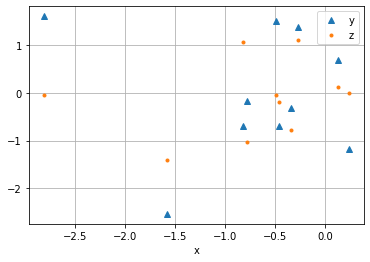

In [ ]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as pl

pl.plot(x, y, '^', label="y")
pl.plot(x, z, '.', label="z")
pl.xlabel('x')
pl.grid()
pl.legend()
pl.show()

### Writing `ndarray`s to textfile

[nump.savetxt](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) is very convenient

In [ ]:
fname = 'output2.txt'

np.savetxt(fname, (x, y, z, t, E), delimiter="\t", fmt="%.3f")

Note that the "columns" get written to lines

In [ ]:
!cat output2.txt

-0.458	0.234	-0.776	0.126	-0.489	-1.583	-0.266	-2.808	-0.817	-0.343
-0.693	-1.181	-0.162	0.697	1.508	-2.545	1.388	1.616	-0.701	-0.313
-0.183	0.010	-1.024	0.129	-0.043	-1.402	1.119	-0.048	1.077	-0.782
1.903	0.430	-0.074	0.857	-2.080	-0.839	1.923	-0.493	0.563	-0.835
1.164	2.670	-0.196	1.117	1.029	0.067	-1.205	-1.383	1.874	0.108


In [ ]:
!cat output.txt

-4.584285498642113876e-01 -6.931398158151874656e-01 -1.831515391988217112e-01 1.902862442922446773e+00 1.164184402126643425e+00
2.344375104948497879e-01 -1.180667713105731043e+00 1.043247968996819514e-02 4.295571617752756977e-01 2.669509106533145992e+00
-7.764712108915364785e-01 -1.620378159982992505e-01 -1.024082137020398076e+00 -7.420150000965577974e-02 -1.962379859950696137e-01
1.261837617762075758e-01 6.968746154610403476e-01 1.292908398330798736e-01 8.569808726518264308e-01 1.117182792551279613e+00
-4.892133602126829128e-01 1.507731124106071130e+00 -4.298460935126557220e-02 -2.080219609775034950e+00 1.028983578280431077e+00
-1.582688391393415106e+00 -2.544568952008750884e+00 -1.401852792343138976e+00 -8.394984292329417119e-01 6.695483387484635340e-02
-2.663281290910665677e-01 1.387824936415045007e+00 1.118622668464062775e+00 1.922567354425250175e+00 -1.205388458751567748e+00
-2.807558406903598591e+00 1.615692728079658913e+00 -4.786744298037505507e-02 -4.925698294234073793e-01 -1.3

# APPLICATION: PROJECTILE TRAJECTORY USING `ndarray`S INSTEAD OF LISTS

We revisit the simulation of the projectile.  Instead of computing $x(t)$ and $y(t)$ seperately and storing all their values in 2 lists (or even 2 `ndarray`s), we compute them with a single function `pos(t)` returning 2 values.  We run this over an `ndarray` of times and store everything as a 2D `ndarray`!

In summary, we use `ndarray` everywhere instead of the list type. However, note that:
- to print the position of the maximum, using **slices** can cause some headaches and confusion when reading the code
  - creating lists `xi` and `yi` makes it more readable
- a slice does not have the same methods of a list – e.g., you can not call `index()` on a slice – so we create a list on the fly `list(pos[:,1]).index(max(pos[:,1]))`

When plotting you have to use **slicing** to specify that column `0` are the $x$ values and column `1` are the $y$ values. `matplotlib.pyplot` accepts 1D `ndarray`s so slicing is enough and we do not need to convert the slices to lists.

In [ ]:
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Data, settings and initial conditions
g = 9.8
t = 0.
h = 10.
x0 = 0
y0 = h
theta = np.deg2rad(30.) # NumPy!
v0 = 30.
dt = 0.01

# Compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s" % (v0x,v0y))

# Evolution function: returns 2 values: x(t), y(t)
def pos(t):
    return x0 + v0x*t, y0 + v0y*t - 0.5*g*t*t

# Generate sampling times as an ndarray
times = np.arange(t, 100., dt)

# Use 2D array to perform a single comprehension
# Stop when y(t)=pos(t)[1] < 0
trajectory = np.array([pos(t) for t in times if pos(t)[1]>=0.])

v0_x: 25.981 m/s 	 v0_y: 15.000 m/s


To see the data, use **slicing**.  The slices are still `ndarray`s.

In [ ]:
print("Shape of array")
print(trajectory.shape)
print(type(trajectory))

#print("All array elements")
#print(trajectory)

Shape of array
(363, 2)
<class 'numpy.ndarray'>


Print all values of the coordinate $x$
- grab all rows with `:`
- grab only column `0`

In [ ]:
print("Only print x values: all rows but column=0")
print(type(trajectory[:,0]))
print(trajectory[:,0])

Only print x values: all rows but column=0
<class 'numpy.ndarray'>
[ 0.          0.25980762  0.51961524  0.77942286  1.03923048  1.29903811
  1.55884573  1.81865335  2.07846097  2.33826859  2.59807621  2.85788383
  3.11769145  3.37749907  3.6373067   3.89711432  4.15692194  4.41672956
  4.67653718  4.9363448   5.19615242  5.45596004  5.71576766  5.97557529
  6.23538291  6.49519053  6.75499815  7.01480577  7.27461339  7.53442101
  7.79422863  8.05403626  8.31384388  8.5736515   8.83345912  9.09326674
  9.35307436  9.61288198  9.8726896  10.13249722 10.39230485 10.65211247
 10.91192009 11.17172771 11.43153533 11.69134295 11.95115057 12.21095819
 12.47076581 12.73057344 12.99038106 13.25018868 13.5099963  13.76980392
 14.02961154 14.28941916 14.54922678 14.8090344  15.06884203 15.32864965
 15.58845727 15.84826489 16.10807251 16.36788013 16.62768775 16.88749537
 17.14730299 17.40711062 17.66691824 17.92672586 18.18653348 18.4463411
 18.70614872 18.96595634 19.22576396 19.48557159 19.745379

Print all values of the coordinate $y$
- grab all rows with `:`
- grab only column `1`

In [ ]:
print("Only print y values: all rows but column=1")
print(type(trajectory[:,1]))
print(trajectory[:,1])

Only print y values: all rows but column=1
<class 'numpy.ndarray'>
[10.      10.14951 10.29804 10.44559 10.59216 10.73775 10.88236 11.02599
 11.16864 11.31031 11.451   11.59071 11.72944 11.86719 12.00396 12.13975
 12.27456 12.40839 12.54124 12.67311 12.804   12.93391 13.06284 13.19079
 13.31776 13.44375 13.56876 13.69279 13.81584 13.93791 14.059   14.17911
 14.29824 14.41639 14.53356 14.64975 14.76496 14.87919 14.99244 15.10471
 15.216   15.32631 15.43564 15.54399 15.65136 15.75775 15.86316 15.96759
 16.07104 16.17351 16.275   16.37551 16.47504 16.57359 16.67116 16.76775
 16.86336 16.95799 17.05164 17.14431 17.236   17.32671 17.41644 17.50519
 17.59296 17.67975 17.76556 17.85039 17.93424 18.01711 18.099   18.17991
 18.25984 18.33879 18.41676 18.49375 18.56976 18.64479 18.71884 18.79191
 18.864   18.93511 19.00524 19.07439 19.14256 19.20975 19.27596 19.34119
 19.40544 19.46871 19.531   19.59231 19.65264 19.71199 19.77036 19.82775
 19.88416 19.93959 19.99404 20.04751 20.1     20.15151 20

You can use slicing again to find the max height. In this case it can be a bit confusing if auxiliary variables are not introduced.

Again: note that `index()` is a method for a list not for slices.

In [ ]:
a = ['a','b','c']
a.index('c')

2

In [ ]:
# Maximum y
max_y = max(trajectory[:,1])
print("Max y: ", max_y)

Max y:  21.47959


In [ ]:
# Index of the maximum y
i_max_y = list(trajectory[:,1]).index(max_y) 
print("Index of max y:", i_max_y)

Index of max y: 153


In [ ]:
# x of max y is the x value with the same index
max_x = trajectory[i_max_y, 0]
print("x of max y:", max_x)

x of max y: 39.75056603370574


In [ ]:
# Print it all together

# Not too easy to read
print("Max height: %.2f at x = %.2f" % (max(trajectory[:,1]), trajectory[list(trajectory[:,1]).index(max(trajectory[:,1])),0]))

# Better
print("Max height: %.2f at x = %.2f" % (max_y, trajectory[i_max_y, 0]))

Max height: 21.48 at x = 39.75
Max height: 21.48 at x = 39.75


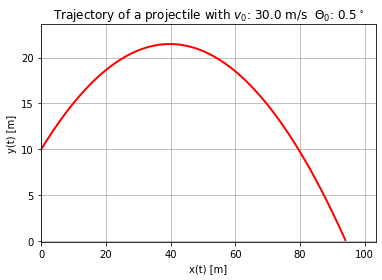

In [ ]:
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(trajectory[:,0])*1.1), ylim=(-0.1,max(trajectory[:,1])*1.1))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0, theta))

# Plot slices for ndarray
line = ax.plot(trajectory[:,0], trajectory[:,1],  lw=2, color='red')

plt.show()

# READY FOR `examples/Python/5-AnimatedPlots.ipynb`!